# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. After collecting data and save it into a local `.csv` file

### Scraping data from Skytrax

After visiting [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

Navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] to see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...


In [ ]:
df.to_csv("/content/BA_reviews.csv")

The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 Refining this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
# Remove unnecessary text, for example, "✅ Trip Verified"
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews'] = df['reviews'].str.replace( 'Not Verified |', '')

# You might want to remove leading and trailing whitespaces after removing the text
df['reviews'] = df['reviews'].str.strip()

# Display the cleaned DataFrame
print(df.head())

# Save the cleaned data to a new CSV file or overwrite the existing one
df.to_csv('cleaned_reviews.csv', index=False)

                                             reviews
0  |  Boarded on time, but it took ages to get to...
1  |  5 days before the flight, we were advised b...
2  |  \r\nWe traveled to Lisbon for our dream vac...
3  |  Booked a flight from Bucharest to Mancheste...
4  |  Booked online months ago and the only hitch...


In [ ]:
df.head()

,reviews
0,"| Boarded on time, but it took ages to get to..."
1,"| 5 days before the flight, we were advised b..."
2,| \r\nWe traveled to Lisbon for our dream vac...
3,| Booked a flight from Bucharest to Mancheste...
4,| Booked online months ago and the only hitch...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

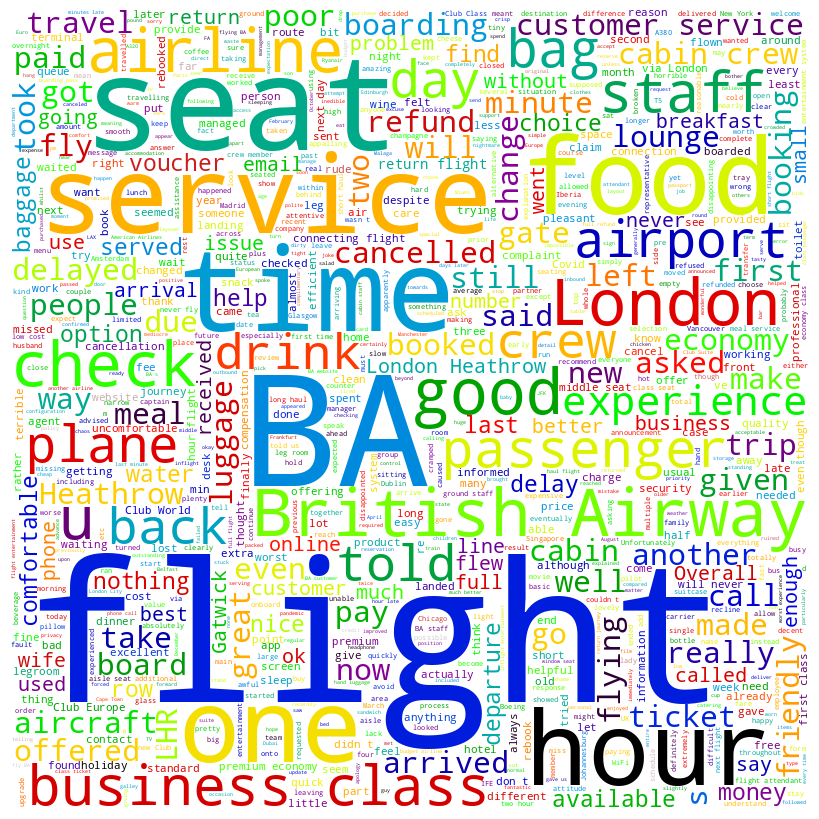

In [ ]:
all_text=df['reviews'].str.cat(sep=' ')
plt.figure(figsize=(12,8))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,max_words=1000, background_color='white',colormap="nipy_spectral", stopwords=stopwords).generate(all_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

If Needed use this
```
column_to_drop = 'Column_Name'

# Use the drop() method to remove the specified column
df = df.drop(column_to_drop, axis=1)

print(df)
```

In [ ]:
# Display the number of missing values in each column
print("Number of missing values before dropping:", df.isnull().sum())

# Drop rows with any missing values
df = df.dropna()

# Display the number of missing values in each column after dropping
print("Number of missing values after dropping:", df.isnull().sum())

Number of missing values before dropping: reviews    0
dtype: int64
Number of missing values after dropping: reviews    0
dtype: int64


# Lexicon-based sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review in the 'reviews' column
df['sentiment_scores'] = df['reviews'].apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Define thresholds for classification
threshold_positive = 0.1
threshold_negative = -0.1

# Classify reviews based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score > threshold_positive else 'negative' if score < threshold_negative else 'neutral')

# Display the results
print(df[['reviews', 'compound_score', 'sentiment']])


                                               reviews  compound_score  \
0    |  Boarded on time, but it took ages to get to...          0.5927   
1    |  5 days before the flight, we were advised b...         -0.8327   
2    |  \r\nWe traveled to Lisbon for our dream vac...          0.8392   
3    |  Booked a flight from Bucharest to Mancheste...         -0.7269   
4    |  Booked online months ago and the only hitch...          0.5956   
..                                                 ...             ...   
995  |  Barcelona to New York via London. I was in ...         -0.8957   
996  |  Gatwick to Fort Lauderdale. Charging to cho...          0.2533   
997  |  We recently flew from London to Bologna, th...         -0.2973   
998  |  \r\nVenice to London City. Really we had a ...          0.9503   
999  |  San Francisco to London. Terrible service a...         -0.5684   

    sentiment  
0    positive  
1    negative  
2    positive  
3    negative  
4    positive  
..        ...  

In [ ]:
df.head()

,reviews,sentiment_scores,compound_score,sentiment
0,"| Boarded on time, but it took ages to get to...","{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'comp...",0.5927,positive
1,"| 5 days before the flight, we were advised b...","{'neg': 0.102, 'neu': 0.833, 'pos': 0.066, 'co...",-0.8327,negative
2,| \r\nWe traveled to Lisbon for our dream vac...,"{'neg': 0.013, 'neu': 0.922, 'pos': 0.065, 'co...",0.8392,positive
3,| Booked a flight from Bucharest to Mancheste...,"{'neg': 0.126, 'neu': 0.815, 'pos': 0.059, 'co...",-0.7269,negative
4,| Booked online months ago and the only hitch...,"{'neg': 0.08, 'neu': 0.825, 'pos': 0.096, 'com...",0.5956,positive


In [ ]:
# Specify the text you want to filter
specific_text = 'positive'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")


Number of 'positive' Reviews: 481


In [ ]:
# Specify the text you want to filter
specific_text = 'negative'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'negative' Reviews: 488


In [ ]:
# Specify the text you want to filter
specific_text = 'neutral'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'neutral' Reviews: 31


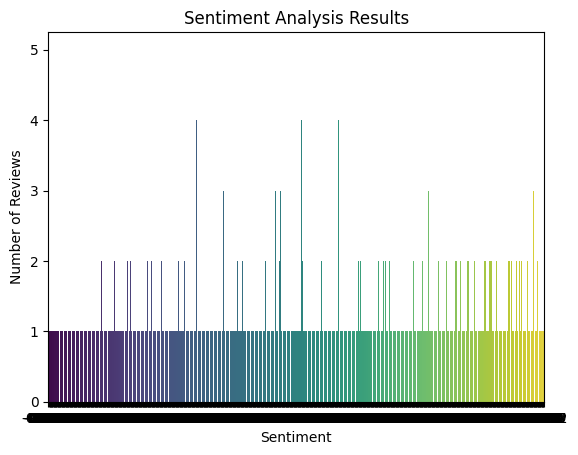

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn countplot
sns.countplot(x='compound_score', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()


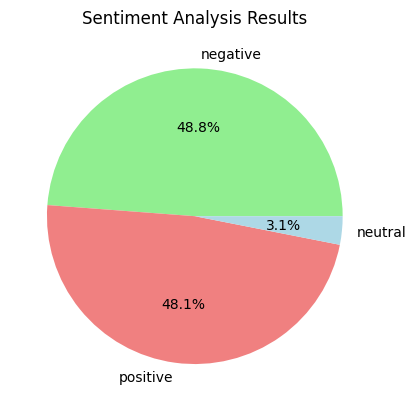

In [ ]:
# Count the number of occurrences for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])

# Add title
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()

:

# BERT MODEL (Bidirectional Encoder Representations from Transformers)

In [ ]:
!pip install transformers
!pip install torch


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('cleaned_reviews.csv')

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Assuming 3 classes: positive, negative, neutral

# Tokenize the reviews and pad sequences
max_len = 64  # Adjust as needed
padded_reviews = []

for review in df['reviews']:
    tokens = tokenizer.encode(review, add_special_tokens=True)
    padded_tokens = tokens[:max_len] + [0] * (max_len - len(tokens))  # Pad with zeros
    padded_reviews.append(padded_tokens)

# Convert to PyTorch tensor
padded_reviews = torch.tensor(padded_reviews)

# Create DataLoader
dataset = torch.utils.data.TensorDataset(padded_reviews)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

# Inference loop
model.eval()
predictions = []

with torch.no_grad():
    for batch in dataloader:
        inputs = batch[0]
        outputs = model(inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1)
        predictions.extend(predicted_class.numpy())

# Map predictions to sentiment labels
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment'] = [label_mapping[pred] for pred in predictions]

# Display the results
print(df[['reviews', 'sentiment']])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


                                               reviews sentiment
0    |  Boarded on time, but it took ages to get to...  positive
1    |  5 days before the flight, we were advised b...  positive
2    |  \r\nWe traveled to Lisbon for our dream vac...  positive
3    |  Booked a flight from Bucharest to Mancheste...  positive
4    |  Booked online months ago and the only hitch...  positive
..                                                 ...       ...
995  |  Barcelona to New York via London. I was in ...  positive
996  |  Gatwick to Fort Lauderdale. Charging to cho...  positive
997  |  We recently flew from London to Bologna, th...  positive
998  |  \r\nVenice to London City. Really we had a ...  positive
999  |  San Francisco to London. Terrible service a...  positive

[1000 rows x 2 columns]


In [ ]:
df.head()

,reviews,sentiment
0,"| Boarded on time, but it took ages to get to...",positive
1,"| 5 days before the flight, we were advised b...",positive
2,| \r\nWe traveled to Lisbon for our dream vac...,positive
3,| Booked a flight from Bucharest to Mancheste...,positive
4,| Booked online months ago and the only hitch...,positive


The model did not work well

In [ ]:
# Specify the text you want to filter
specific_text = 'positive'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'positive' Reviews: 982


In [ ]:
# Specify the text you want to filter
specific_text = 'negative'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'negative' Reviews: 18


In [ ]:
# Specify the text you want to filter
specific_text = 'neutral'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'neutral' Reviews: 0


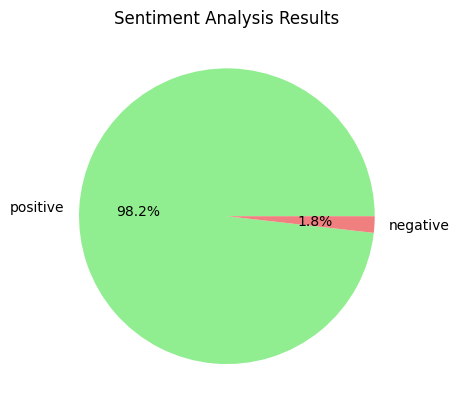

In [ ]:
# Count the number of occurrences for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])

# Add title
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()

A biased result from BERT

# Frequency Chart

In [ ]:
from nltk import FreqDist, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('cleaned_reviews.csv')


In [ ]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'reviews' column
df['reviews_no_stopwords'] = df['reviews'].apply(remove_stopwords)


In [ ]:
print(df[['reviews', 'reviews_no_stopwords']])


                                               reviews  \
0    |  Boarded on time, but it took ages to get to...   
1    |  5 days before the flight, we were advised b...   
2    |  \r\nWe traveled to Lisbon for our dream vac...   
3    |  Booked a flight from Bucharest to Mancheste...   
4    |  Booked online months ago and the only hitch...   
..                                                 ...   
995  |  Barcelona to New York via London. I was in ...   
996  |  Gatwick to Fort Lauderdale. Charging to cho...   
997  |  We recently flew from London to Bologna, th...   
998  |  \r\nVenice to London City. Really we had a ...   
999  |  San Francisco to London. Terrible service a...   

                                  reviews_no_stopwords  
0    | Boarded time , took ages get runway due cong...  
1    | 5 days flight , advised BA cancelled asked u...  
2    | traveled Lisbon dream vacation , cruise Port...  
3    | Booked flight Bucharest Manchester 2h 45 ’ l...  
4    | Booked onli

In [ ]:
df["reviews_no_stopwords"][999]

'| San Francisco London . Terrible service food . Cramped uncomfortable seats terrible entertainment , one flights ’ working . crew ’ care less , fly ! ! !'

In [ ]:
from nltk.corpus import stopwords
def clean_reviews_no_stopwords(text):

    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    return text

In [ ]:
df["reviews_no_stopwords"] = df["reviews_no_stopwords"].apply(clean_reviews_no_stopwords)

In [ ]:
# Tokenize the reviews into words
all_words = [word.lower() for review in df['reviews_no_stopwords'] for word in word_tokenize(review)]

# Calculate the frequency distribution
freq_dist = FreqDist(all_words)


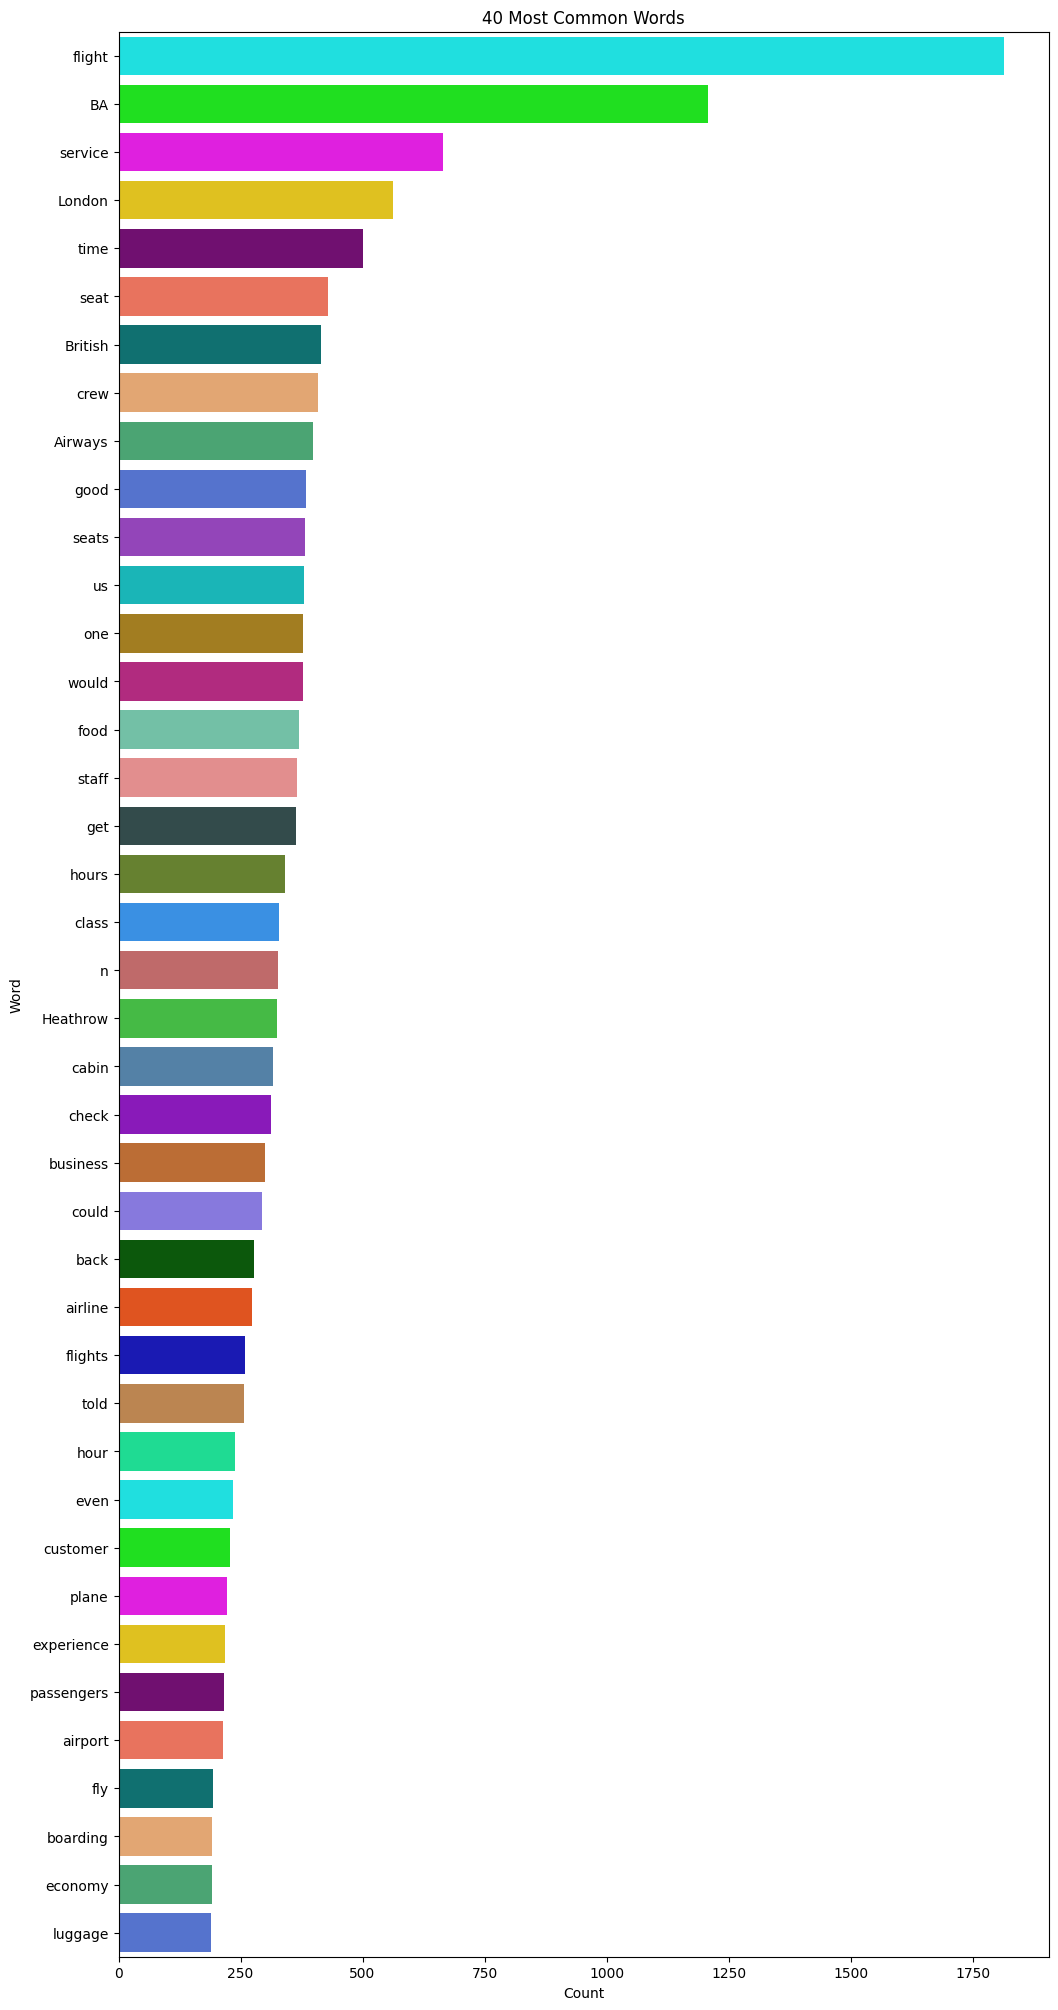

In [ ]:
from itertools import chain
from collections import Counter

data_set =df["reviews_no_stopwords"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(40)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 25))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('40 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
print(df_common_words)

          Word  Count
0       flight   1815
1           BA   1208
2      service    664
3       London    563
4         time    501
5         seat    430
6      British    415
7         crew    409
8      Airways    398
9         good    384
10       seats    383
11          us    380
12         one    379
13       would    379
14        food    370
15       staff    365
16         get    363
17       hours    341
18       class    328
19           n    327
20    Heathrow    325
21       cabin    317
22       check    313
23    business    300
24       could    295
25        back    278
26     airline    273
27     flights    259
28        told    257
29        hour    239
30        even    235
31    customer    228
32       plane    222
33  experience    219
34  passengers    216
35     airport    215
36         fly    194
37    boarding    192
38     economy    192
39     luggage    189


In [ ]:
# Get the 40 most common words
top_words = freq_dist.most_common(40)

# Create a DataFrame with the 40 most common words
df_common_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Save the DataFrame to a CSV file
df_common_words.to_csv('common_words.csv', index=False)